In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/tweet_emotions.csv")
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
df.rename(columns={"sentiment": "emotion"}, inplace=True)
df.emotion.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: emotion, dtype: int64

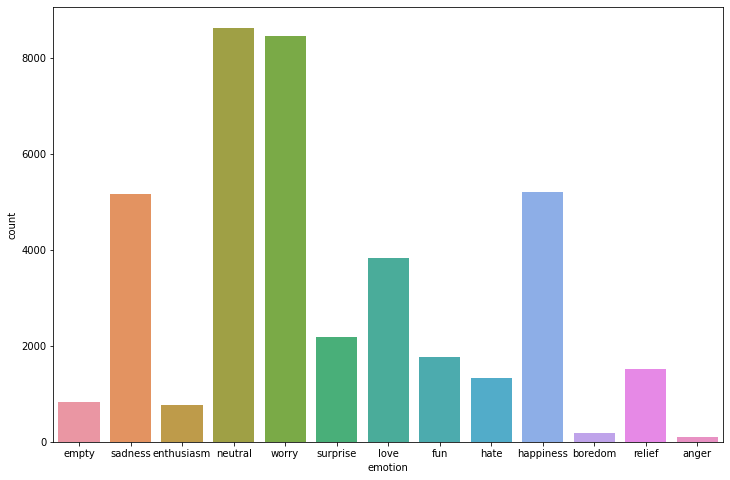

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))
sns.countplot(x="emotion", data=df)
plt.show()

In [ ]:
df.emotion.replace("empty", "neutral", inplace=True)
df.emotion.replace("anger", "hate", inplace=True)
df.emotion.replace("boredom", "neutral", inplace=True)
df.emotion.value_counts()

neutral       9644
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1433
enthusiasm     759
Name: emotion, dtype: int64

In [ ]:
df.drop(["tweet_id"], axis=1, inplace=True)

In [ ]:
!pip install neattext
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cols_ = list(df.columns)
df = df.sample(frac=1).reset_index()
df = df[cols_]
emotion_list = {"hate", "happiness", "sadness", "neutral"}
new_df = pd.DataFrame(columns=cols_)
for emotion in emotion_list:
  emotion_df = df[df["emotion"] == emotion]
  new_df = pd.concat([new_df, emotion_df.head(1000)])

  # print(emotion, len(emotion_df))
  # for i in range(200):
  #   new_df.loc[len(new_df)] = pd.Series(emotion_df.loc[i], index=df.columns)
print(new_df.columns)
new_df["emotion"].value_counts()

Index(['emotion', 'content'], dtype='object')


happiness    1000
neutral      1000
hate         1000
sadness      1000
Name: emotion, dtype: int64

In [ ]:
cols_ = list(new_df.columns)
new_df = new_df.sample(frac=1).reset_index()
new_df = new_df[cols_]
new_df.head(10)

,emotion,content
0,sadness,Just been asked to sing yet again....aha. coff...
1,neutral,"@joseevans Hi, I teach some Chinese lessons on..."
2,sadness,"Dammit, forgot to go canvas shopping today"
3,sadness,@watermelon39 haha! And Twitter! Hard though i...
4,neutral,@kyleandjackieo i just downloaded Bonnie and C...
5,hate,@neillavin300 Ok well from the pic i take it y...
6,sadness,the dog dug a hole in the backyard well iwas s...
7,neutral,"Oh, great. I suppose it was inevitable I'd ge..."
8,hate,@brooketastic my keys were cracking and crap. ...
9,happiness,Yes we Can make it ......Obama
